In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import table

import numpy as np

#file with the information from the process RE - SIE from 2017 to 2020 
dfcontratos = pd.read_csv("contratos-unificado-final.csv",converters={'Ruc': lambda x: str(x)})



In [2]:
#adding two columns to the df (year and month)

def get_year(x): # voy a recibir x y x es una serio
    #temp = pd.to_datetime(x["Date"])
    my_date = datetime.strptime(x['Execution-Date'], "%Y-%m-%d")
    year = my_date.strftime('%Y')
    
    return year

def get_month(x): # voy a recibir x y x es una serio
    #temp = pd.to_datetime(x["Date"])
    my_date = datetime.strptime(x['Execution-Date'], "%Y-%m-%d")
    month = my_date.strftime('%m')
    
    return month

dfcontratos["Year"] = dfcontratos.apply(get_year, axis = 1)#aplica categoria a cada fila
dfcontratos["Month"] = dfcontratos.apply(get_month, axis = 1)
dfcontratos2 = dfcontratos
dfcontratos2.to_csv('C:/Users/elcjo/hagp/empresasconaltoscontratos2.csv')

Year
2017     3577501.30
2018    11556172.75
2019    67898705.46
2020    14890580.57
Name: TotalCost, dtype: float64


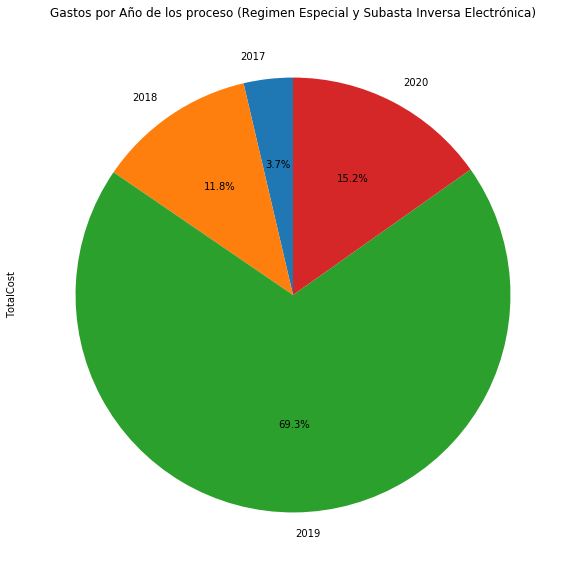

In [3]:
#import plotly.express as px
grouped = dfcontratos.groupby('Year')
print (grouped['TotalCost'].agg(np.sum))
dfgrouped =grouped['TotalCost'].agg(np.sum)

#This graph show the expenses per year (process "Regimen Especial" and "Subasta Inversa Electronica")
dfgrouped.plot.pie(y=('Year'),figsize=(15, 10),autopct='%1.1f%%', startangle=90,title='Gastos por Año de los proceso (Regimen Especial y Subasta Inversa Electrónica)')
plt.show()

#fig = px.pie(dfgrouped, values='pop', names='Year', title='Gastos por Año de los proceso (Regimen Especial y Subasta Inversa Electrónica)')
#fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
Company         60 non-null object
Year            60 non-null object
Ruc             60 non-null object
TotalCostSum    60 non-null float64
NumContratos    60 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ KB


Year
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

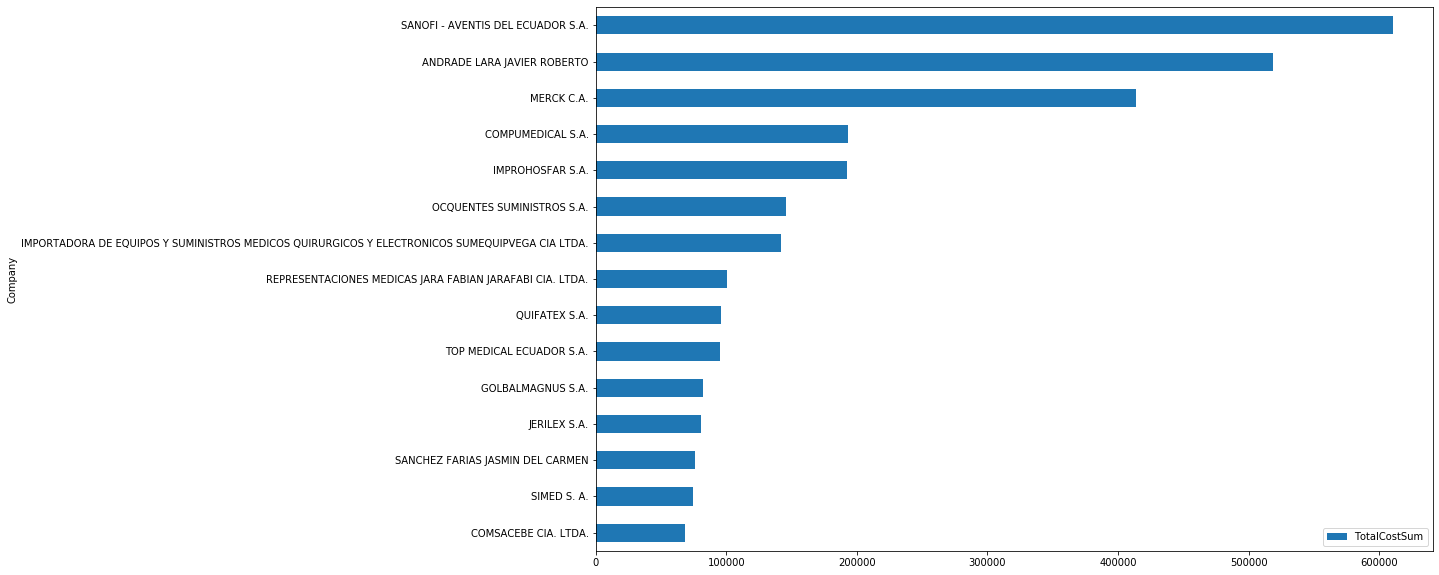

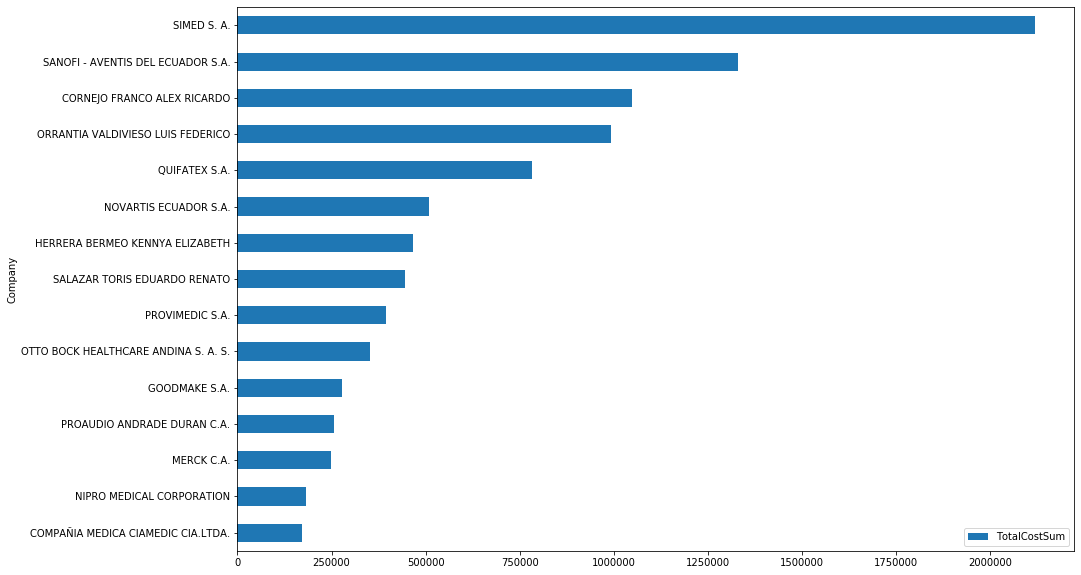

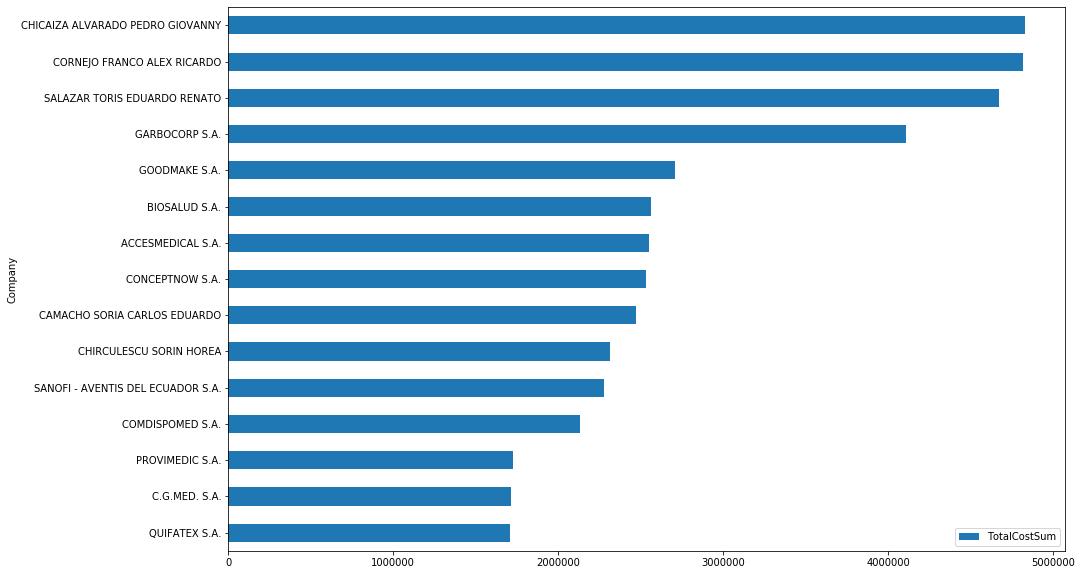

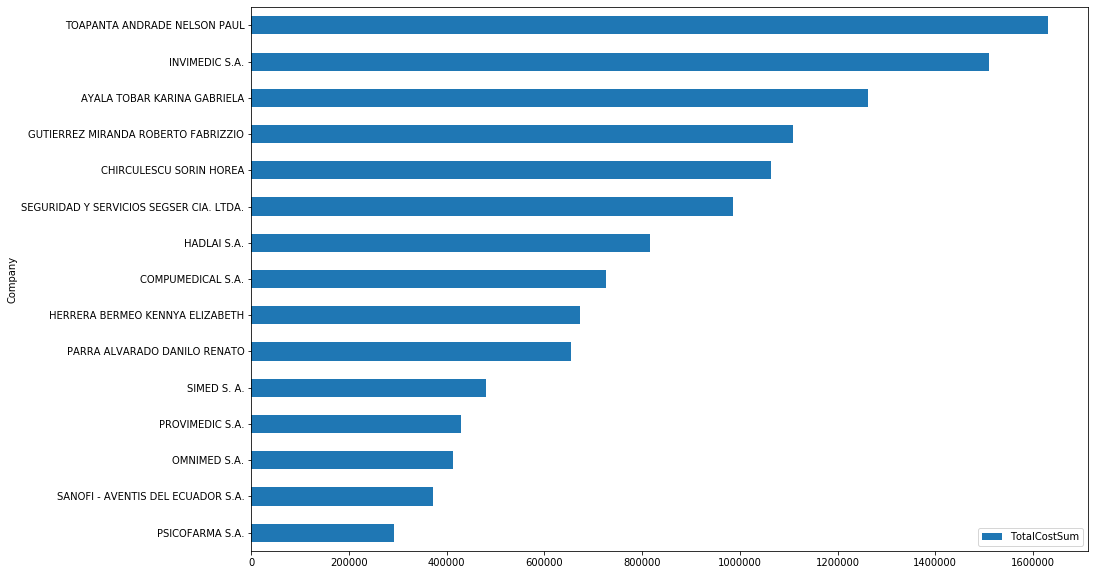

In [4]:
x = range(2017, 2021, 1)
dfunified = pd.DataFrame()

for year in x:
    newdf2 = dfcontratos[(dfcontratos.Year == str(year))]
    df = newdf2.groupby(['Company','Year','Ruc']).agg({'TotalCost':['sum','count']})
    df.sort_values(by=[('TotalCost','sum')], inplace=True)
    
 
    dfunified = pd.concat([dfunified,df[df.shape[0]-15:]])
    


dfunified = dfunified.reset_index()

dfunified.columns = [
  'Company',
  'Year',
  'Ruc',
  'TotalCostSum',
  'NumContratos'
]
dfunified.info()
dfunified.to_csv('C:/Users/elcjo/hagp/empresas-contratosaltos.csv')
df2=dfunified.groupby(['Year'])

#The following graphs per year since 2017 to 2020 show the 15 companies that have had the highest contracts.
df2.plot('Company','TotalCostSum', kind = 'barh',figsize=(15,10))


Year
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

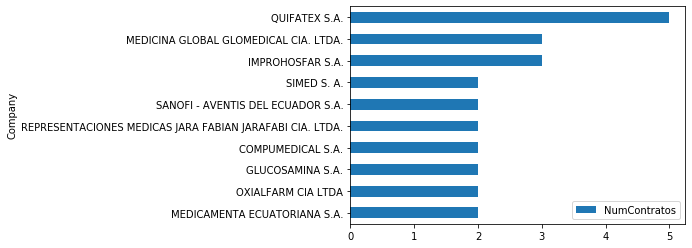

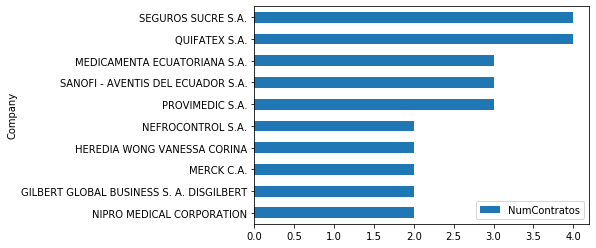

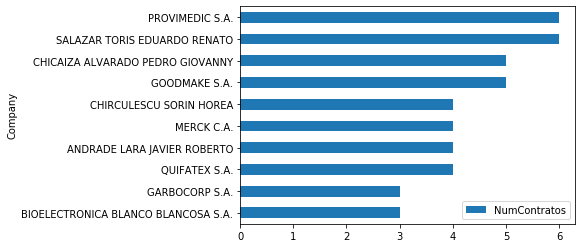

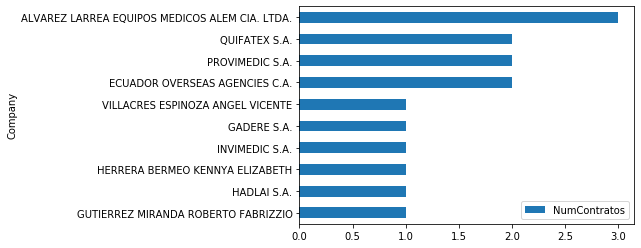

In [16]:
x = range(2017, 2021, 1)
dfunified = pd.DataFrame()

for year in x:
   
    newdf2 = dfcontratos[(dfcontratos.Year == str(year))]
    df = newdf2.groupby(['Company','Year','Ruc']).agg({'TotalCost':['sum','count']})
    #print(df)   
    df.sort_values(by=[('TotalCost','count')], inplace=True)
    
    dfunified = pd.concat([dfunified,df[df.shape[0]-10:]])
    

dfunified = dfunified.reset_index()

dfunified.columns = [
  'Company',
  'Year',
  'Ruc',
  'TotalCostSum',
  'NumContratos'
]
#dfunified.info()
dfunified.to_csv('C:/Users/elcjo/hagp/empresas-contratosaltos.csv')
df2=dfunified.groupby(['Year'])
#The following graph per year show the 10 companies that got more contracts.
df2.plot('Company','NumContratos', kind = 'barh')


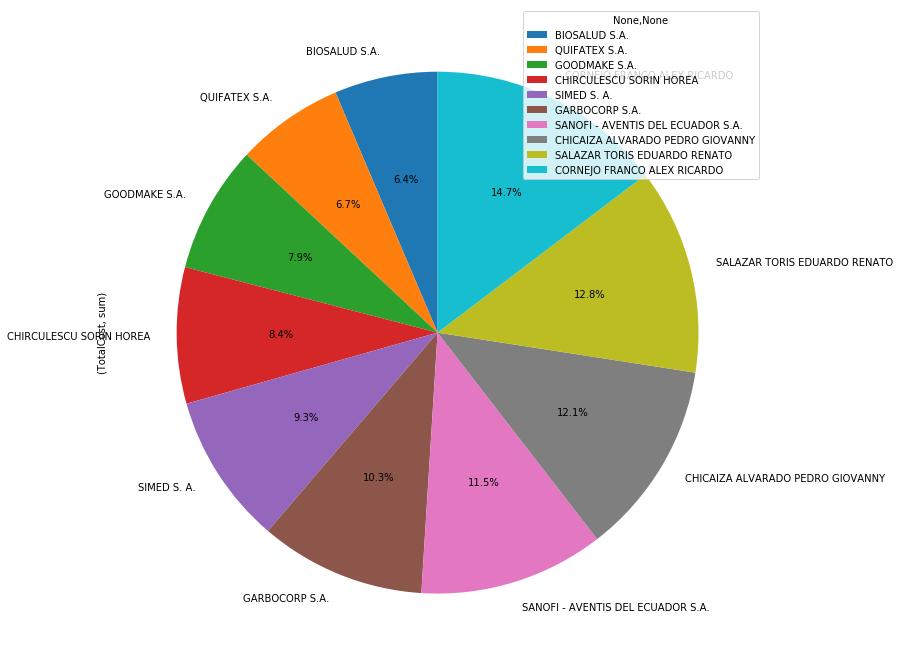

In [17]:
import matplotlib as mp

df = dfcontratos.groupby(['Company']).agg({'TotalCost':['sum','count']})
df.sort_values(by=[('TotalCost','sum')], inplace=True)
#print(df)
df = df[df.shape[0]-10:]

df.plot.pie(y=('TotalCost','sum'),figsize=(12, 12),autopct='%1.1f%%', startangle=90)
plt.show()


                                    TotalCost      
                                          sum count
Company                                            
BIOSALUD S.A.                      2560467.15     2
QUIFATEX S.A.                      2666008.51    15
GOODMAKE S.A.                      3160563.20     8
CHIRCULESCU SORIN HOREA            3374000.00     5
SIMED S. A.                        3741484.59     6
GARBOCORP S.A.                     4108880.00     3
SANOFI - AVENTIS DEL ECUADOR S.A.  4587497.43     9
CHICAIZA ALVARADO PEDRO GIOVANNY   4832352.00     5
SALAZAR TORIS EDUARDO RENATO       5116572.29     7
CORNEJO FRANCO ALEX RICARDO        5868800.00     4


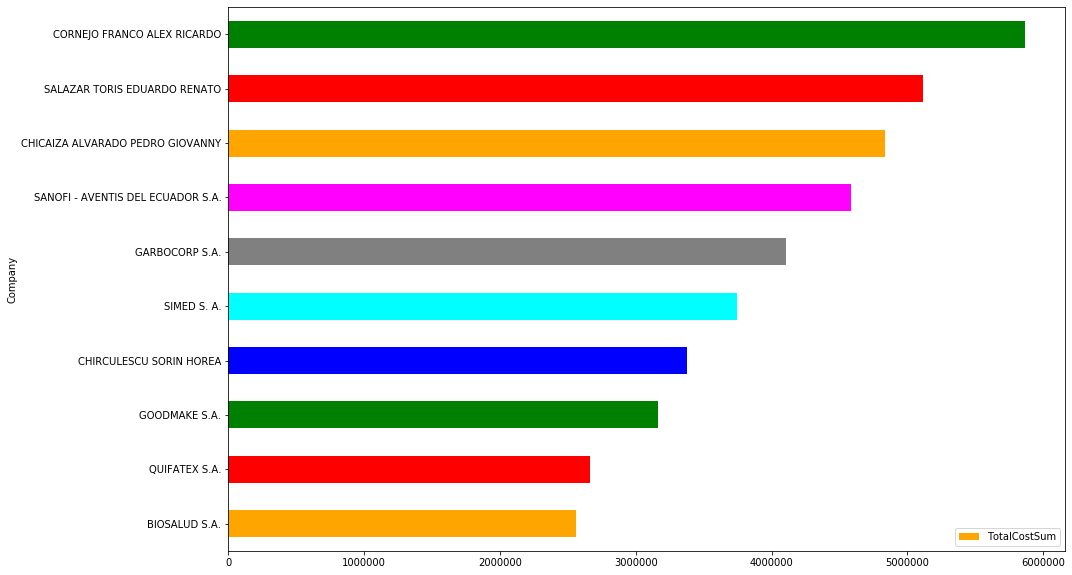

In [44]:
import matplotlib as mp

df = dfcontratos.groupby(['Company']).agg({'TotalCost':['sum','count']})
df.sort_values(by=[('TotalCost','sum')], inplace=True)
#print(df)
df = df[df.shape[0]-10:]
print(df)
#This graph shows the 10 companies that got high contracts since 2017 - 2020
df2 = df.reset_index()
df2.columns = [
  'Company',
  'TotalCostSum',
  'NumContratos'
]

'''df2['Address'] = ''
dfaddress = pd.read_csv("C:/Users/elcjo/hagp/empresas-contratosaltos-2.csv",encoding='latin1')#encoding='latin1')
print(df2)
for index, row in df2.iterrows():
    company = row['Company']
    #address = dfaddress[dfaddress['Company']==company]['Address'].values
    #address = dfaddress.query('Company'== company)['Address']
    
    print(company + ' ' + dfaddress.loc[dfaddress['Company'] == company, 'Address'].unique())'''



df2.plot('Company','TotalCostSum', kind = 'barh',figsize=(15,10),color=['orange', 'red', 'green', 'blue', 'cyan','grey','magenta'])
#print(dfcontratos.head)
#df3 = dfcontratos[df2['Company']==dfcontratos['Company']].groupby(['Company','Year']).agg({'TotalCost':['sum','count']})

#df3 = df3[df3.shape[0]-10:]
#print(df3)


In [9]:
y = range(2017, 2021, 1)
dfunified2 = pd.DataFrame()
dfcontratos2 = dfcontratos[['Year', 'Budget', 'TotalCost']]

for year in y:
    newdf = dfcontratos2[(dfcontratos2.Year == str(year))]
    
    df = newdf.groupby(['Year']).agg({'TotalCost':['sum'],'Budget':['sum']})
   
    dfunified2 = pd.concat([dfunified2,df])
  
dfunified2=dfunified2.reset_index()

dfunified2.columns = [
  'Year',
  'TotalCostSum',
  'BudgetSum'
]
print(dfunified2)
#df2=dfunified.groupby(['Year'])
#df2.plot('Company',[('Budget', 'sum')], kind = 'bar')


   Year  TotalCostSum    BudgetSum
0  2017    3577501.30   7672513.26
1  2018   11556172.75  12555994.88
2  2019   67898705.46  71662795.76
3  2020   14890580.57  16394167.96


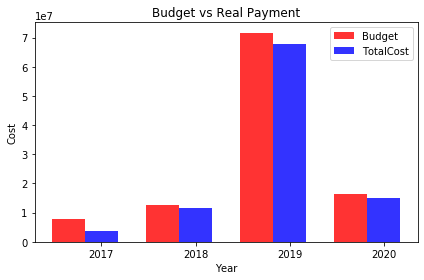

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
budget = dfunified2['BudgetSum']
budget_list = budget.values.tolist()
#print (budget_list)

totalcost = dfunified2['TotalCostSum']
totalcost_list = totalcost.values.tolist()
#print(totalcost_list)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, budget_list, bar_width,
alpha=opacity,
color='r',
label='Budget')

rects2 = plt.bar(index + bar_width, totalcost_list, bar_width,
alpha=opacity,
color='b',
label='TotalCost')

plt.xlabel('Year')
plt.ylabel('Cost')
plt.title('Budget vs Real Payment')
plt.xticks(index + bar_width, ('2017', '2018', '2019', '2020'))
plt.legend()

plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 3 columns):
(AdminContact, )    57 non-null object
(Company, )         57 non-null object
(Code, count)       57 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.5+ KB
None


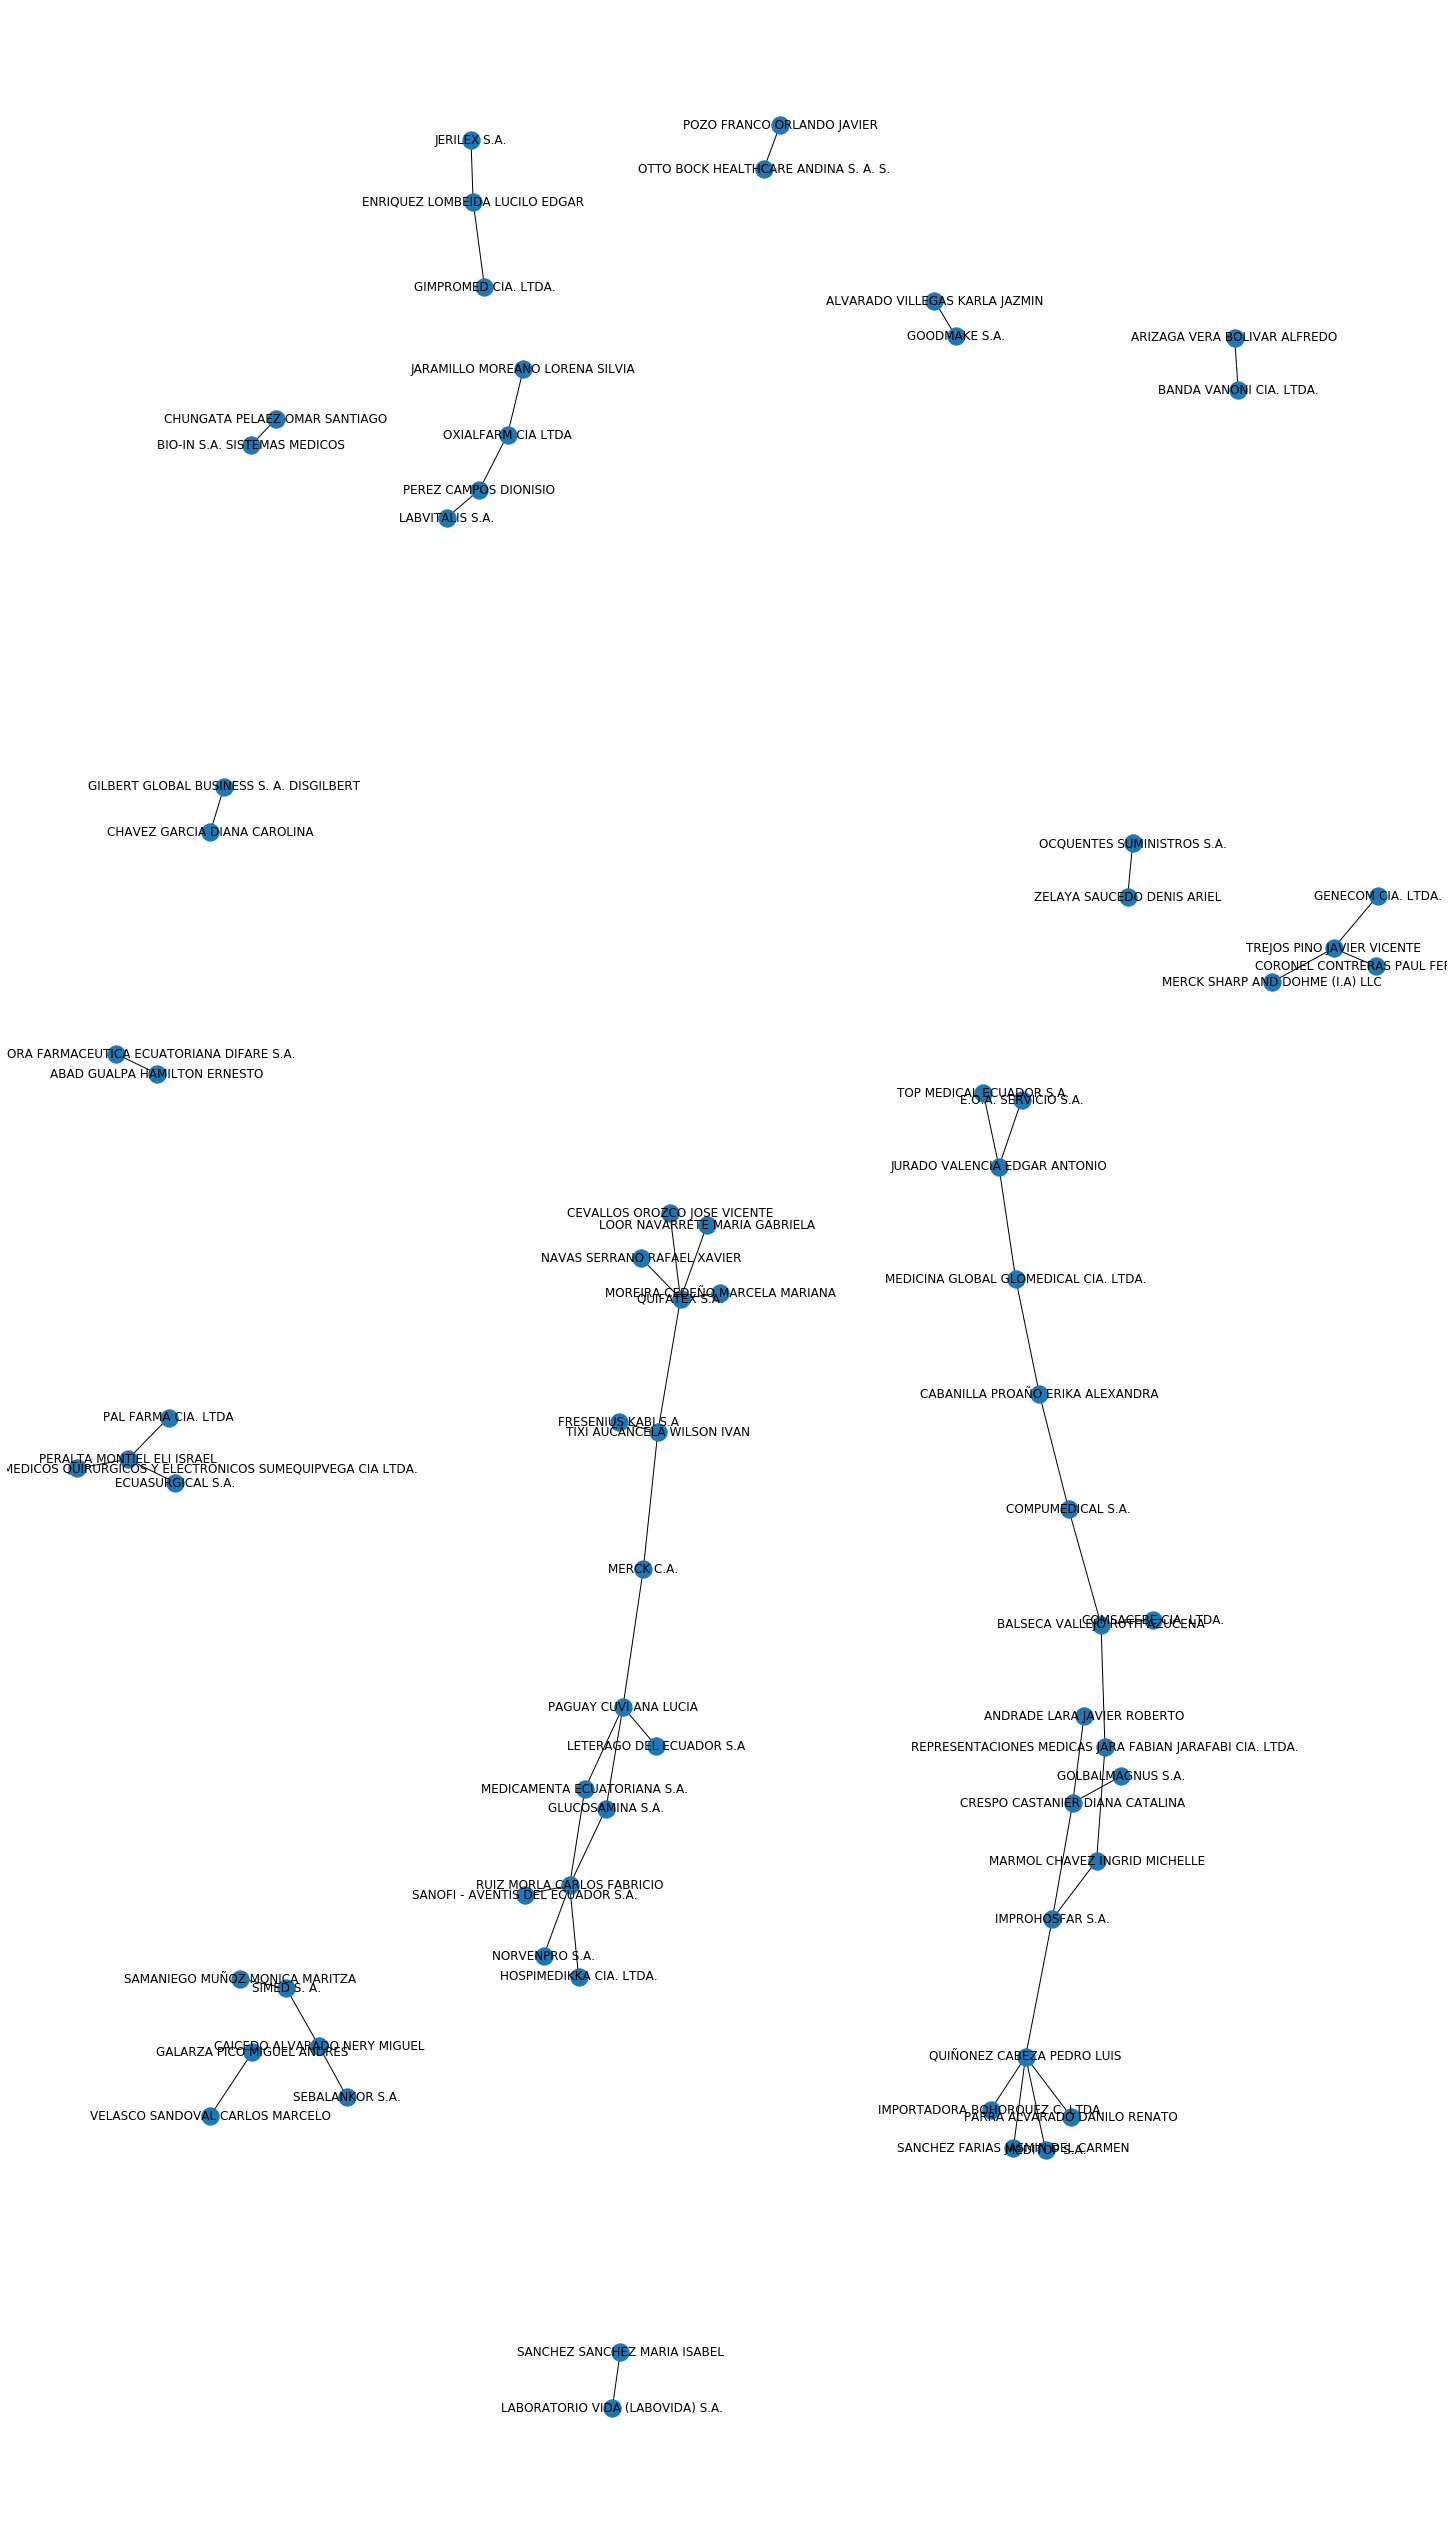

In [65]:
newdf2 = dfcontratos[(dfcontratos.Year == str('2017'))]

df2017 = newdf2.groupby(['AdminContact','Company']).agg({'Code':['count']})
df3 = df2017.reset_index()
print(df3.info())

# Build your graph
import networkx as nx
from matplotlib.pyplot import figure
 

G=nx.from_pandas_edgelist(df3, 'AdminContact', 'Company')
 
# Plot it
figure(figsize=(20, 35))
nx.draw(G, with_labels=True)
plt.show()

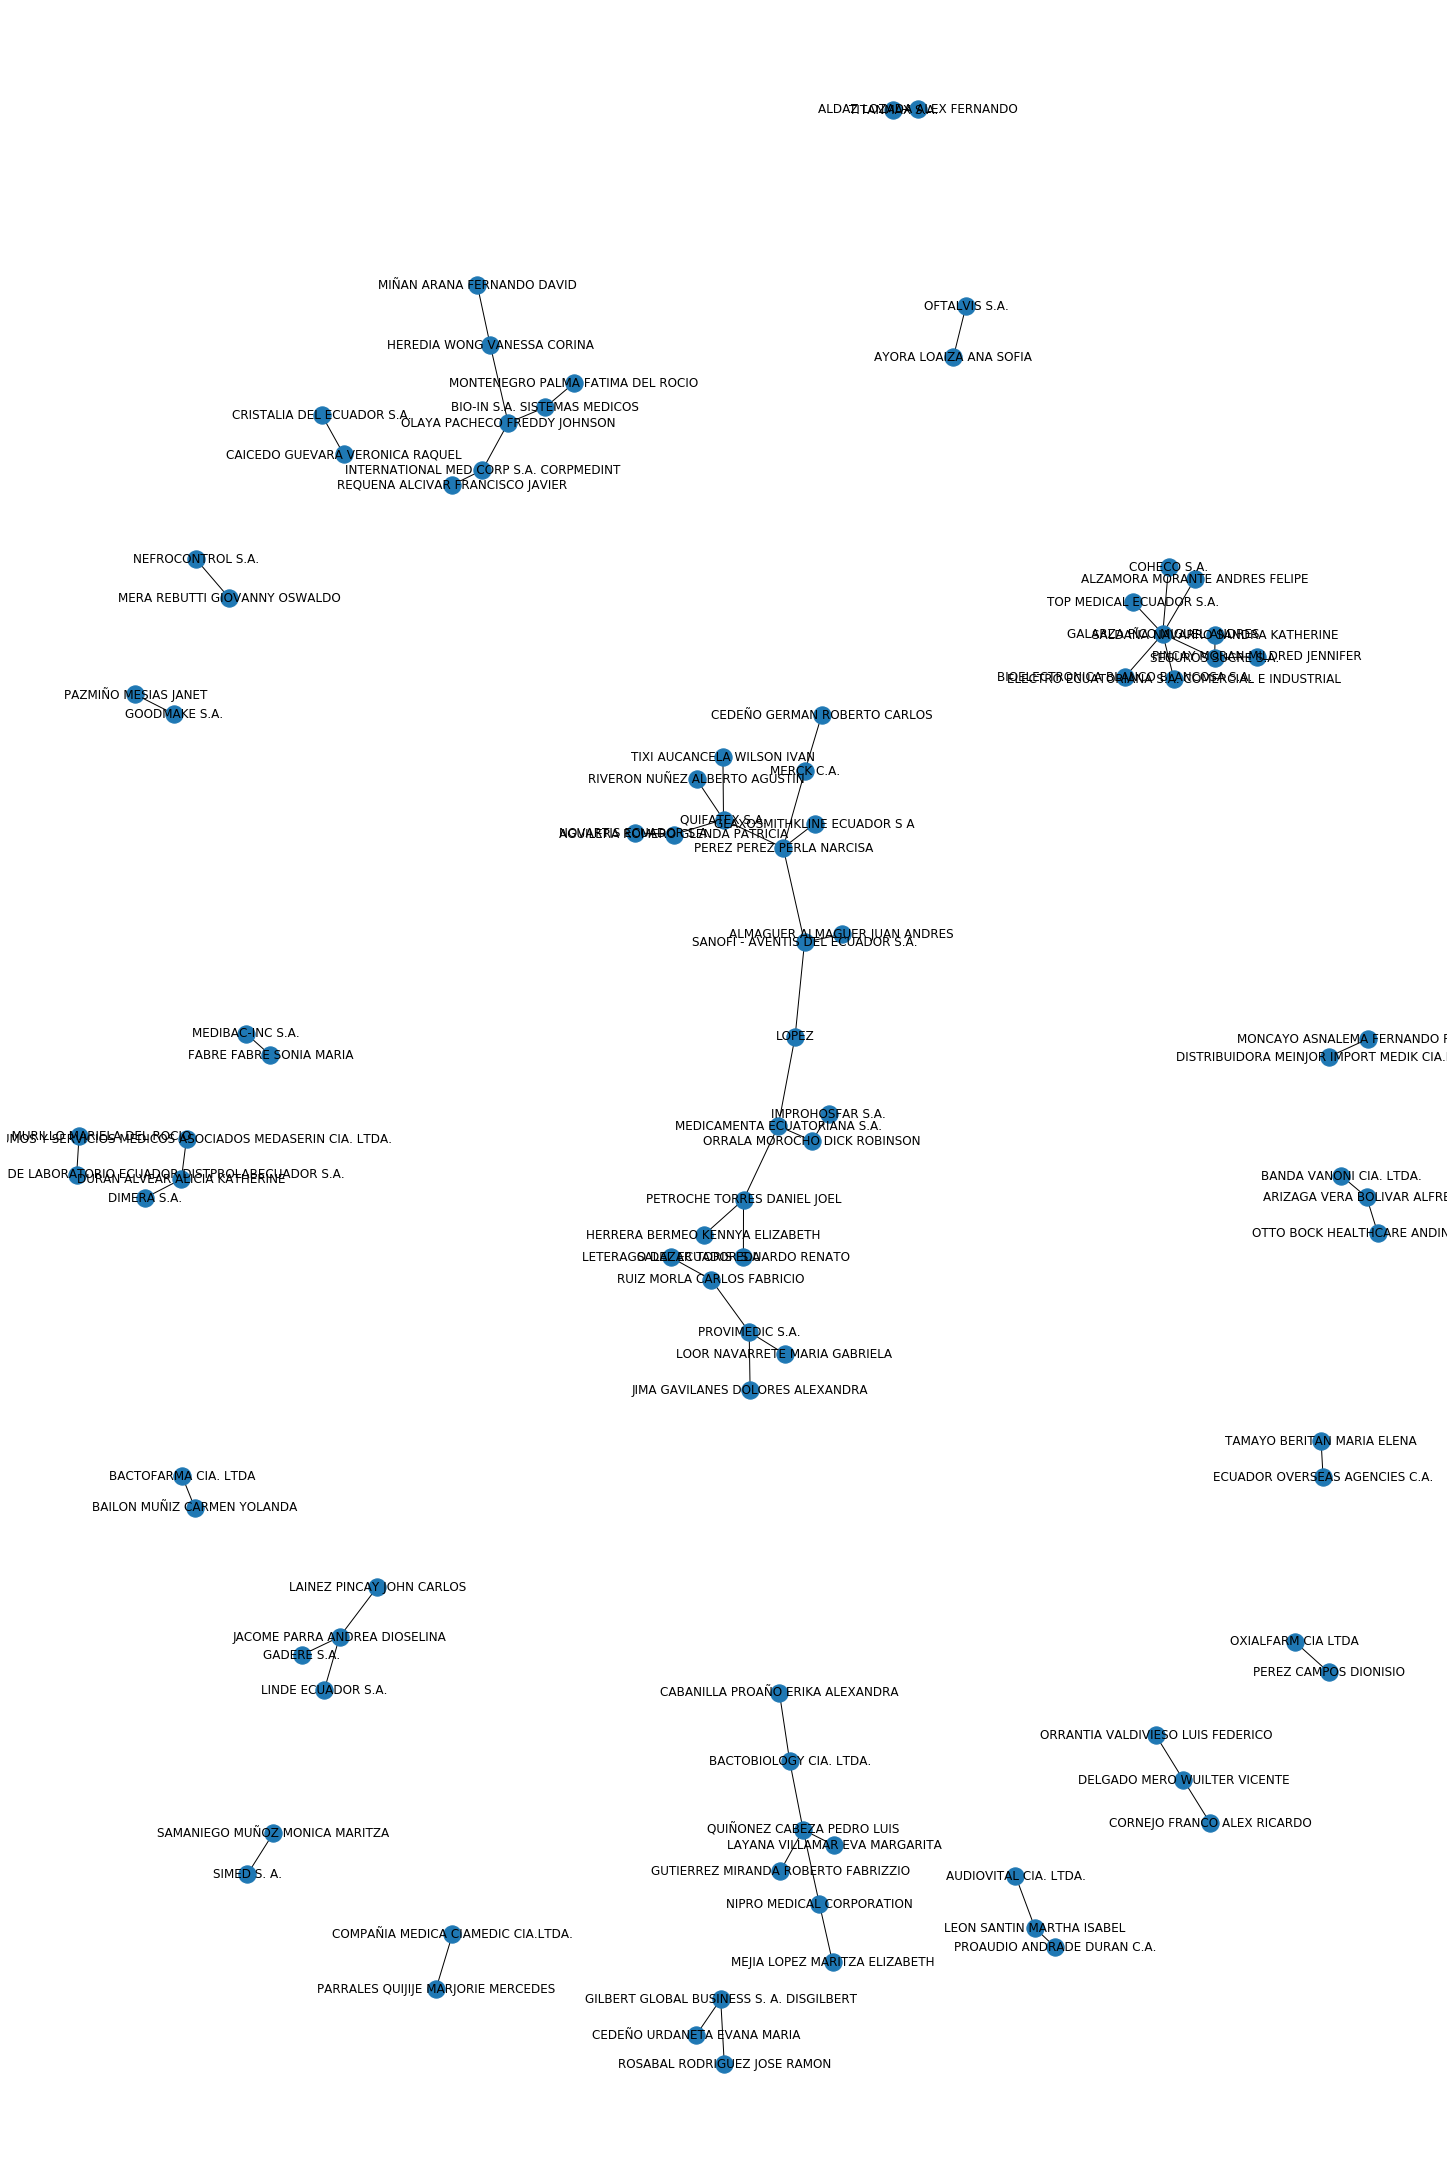

In [40]:
#2018
df2018 = dfcontratos[(dfcontratos.Year == str('2018'))]

df2018 = df2018.groupby(['AdminContact','Company']).agg({'Code':['count']})
df3 = df2018.reset_index()
#print(df4.info())

# Build your graph
import networkx as nx
from matplotlib.pyplot import figure
 

G=nx.from_pandas_edgelist(df3, 'AdminContact', 'Company')
 
# Plot it
figure(figsize=(20, 30))
nx.draw(G, with_labels=True)
plt.show()

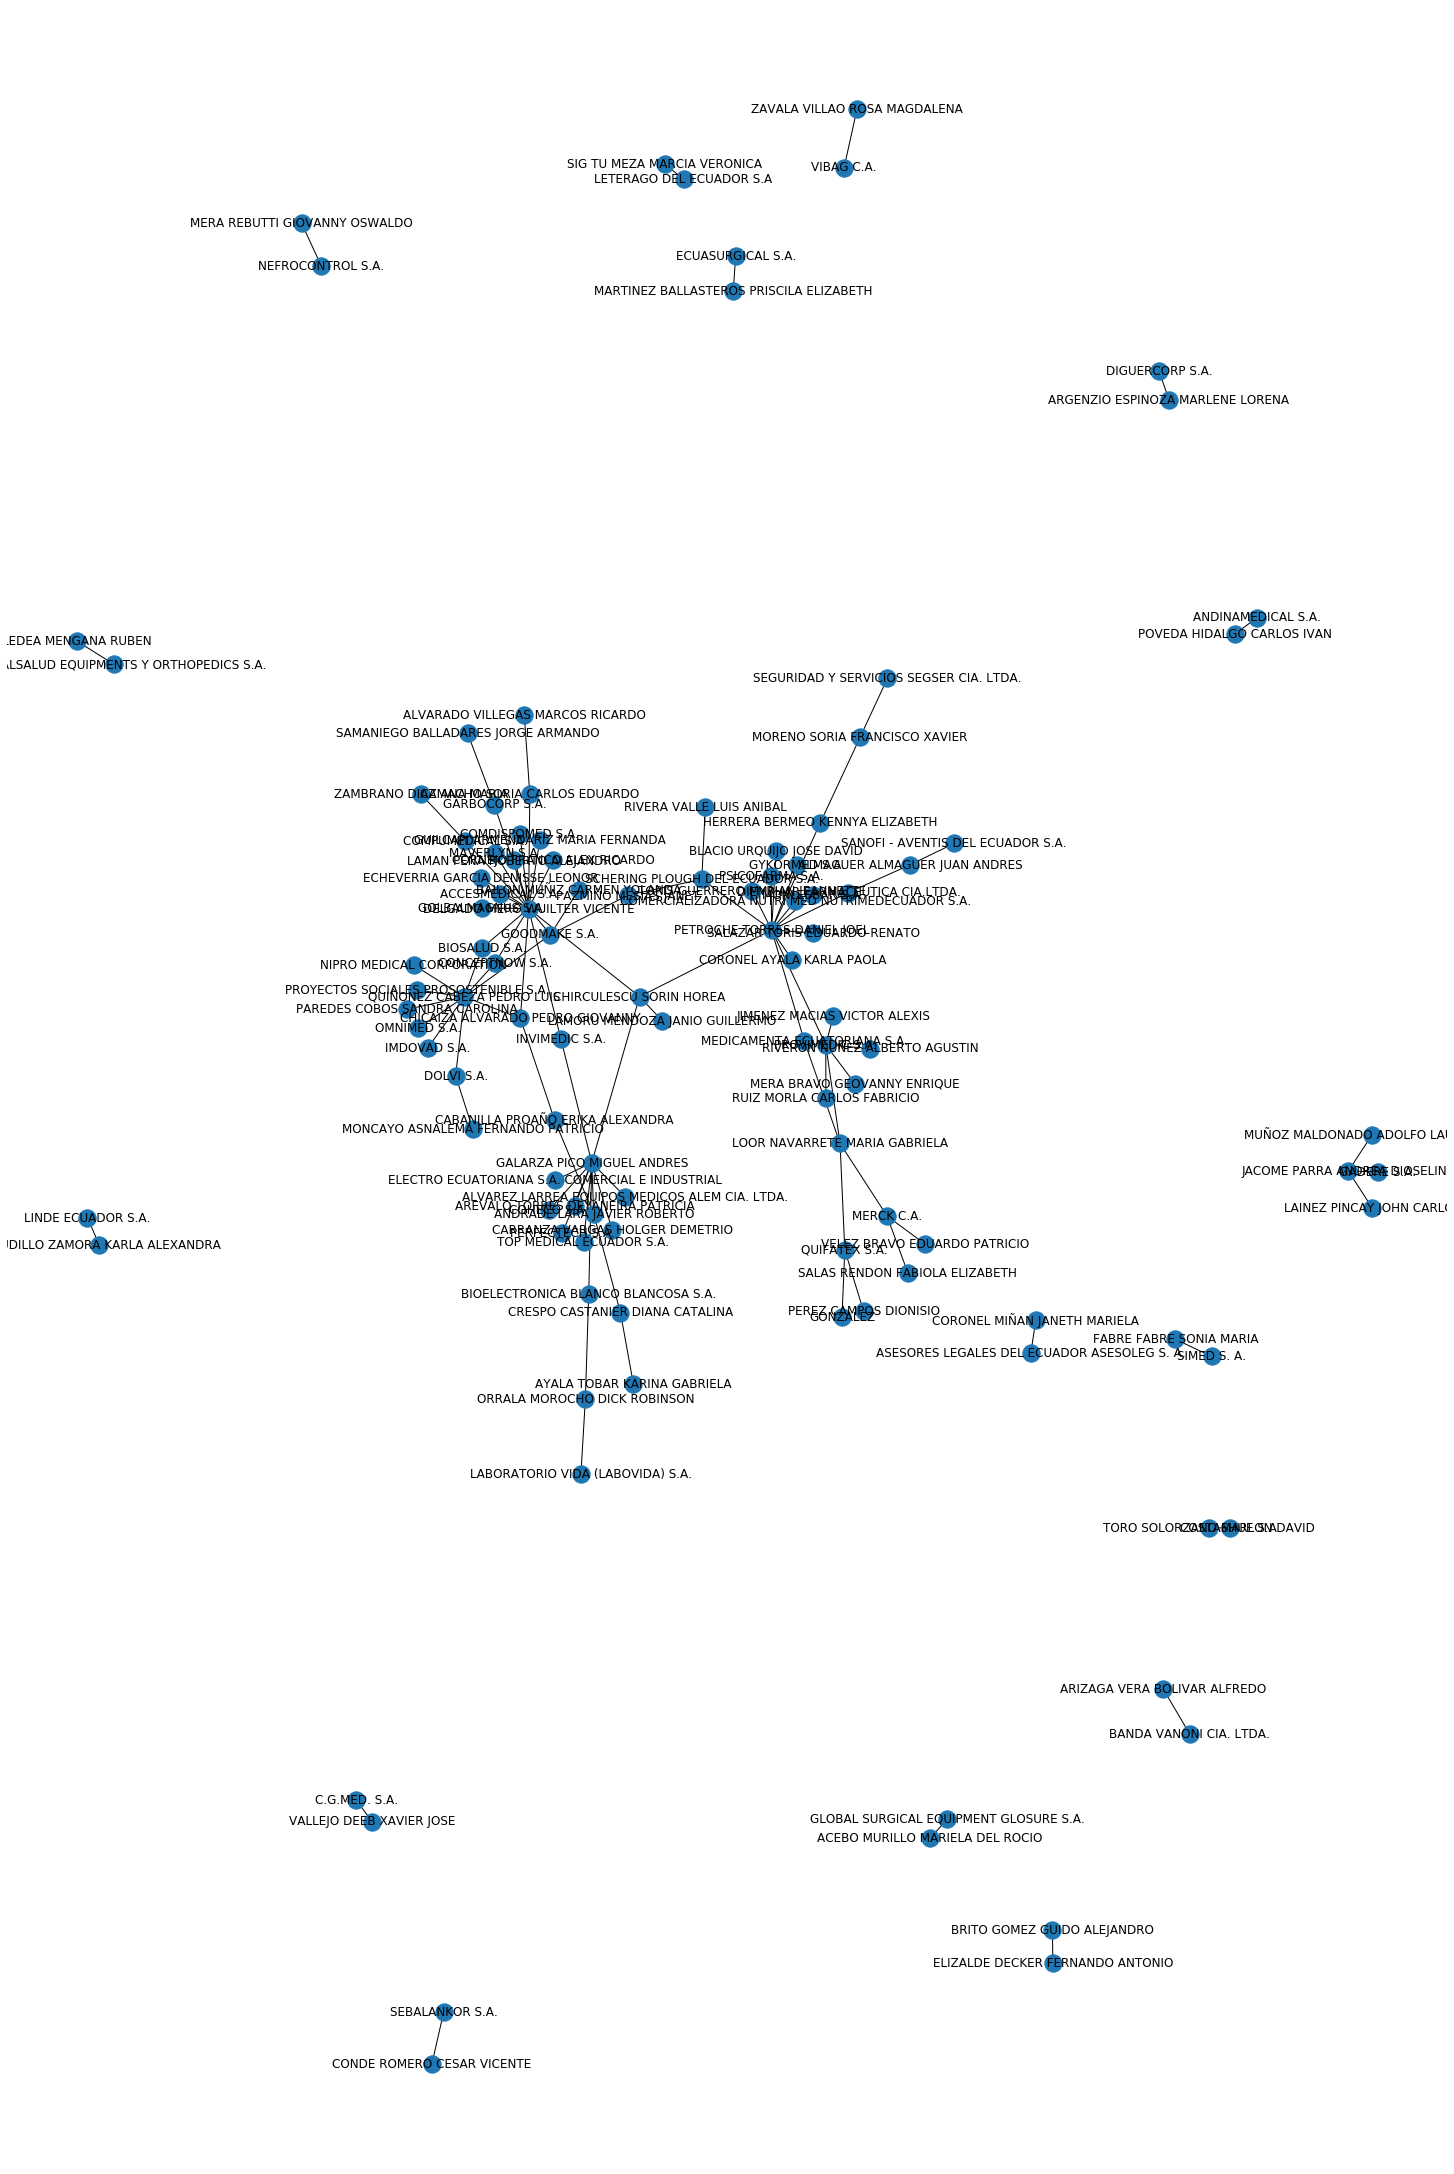

In [41]:
#2019
df2019 = dfcontratos[(dfcontratos.Year == str('2019'))]

df2019 = df2019.groupby(['AdminContact','Company']).agg({'Code':['count']})
df4 = df2019.reset_index()
#print(df4.info())

# Build your graph
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
 


G=nx.from_pandas_edgelist(df4, 'AdminContact', 'Company')
 
# Plot it
figure(figsize=(20, 30))
nx.draw(G, with_labels=True)
plt.show()

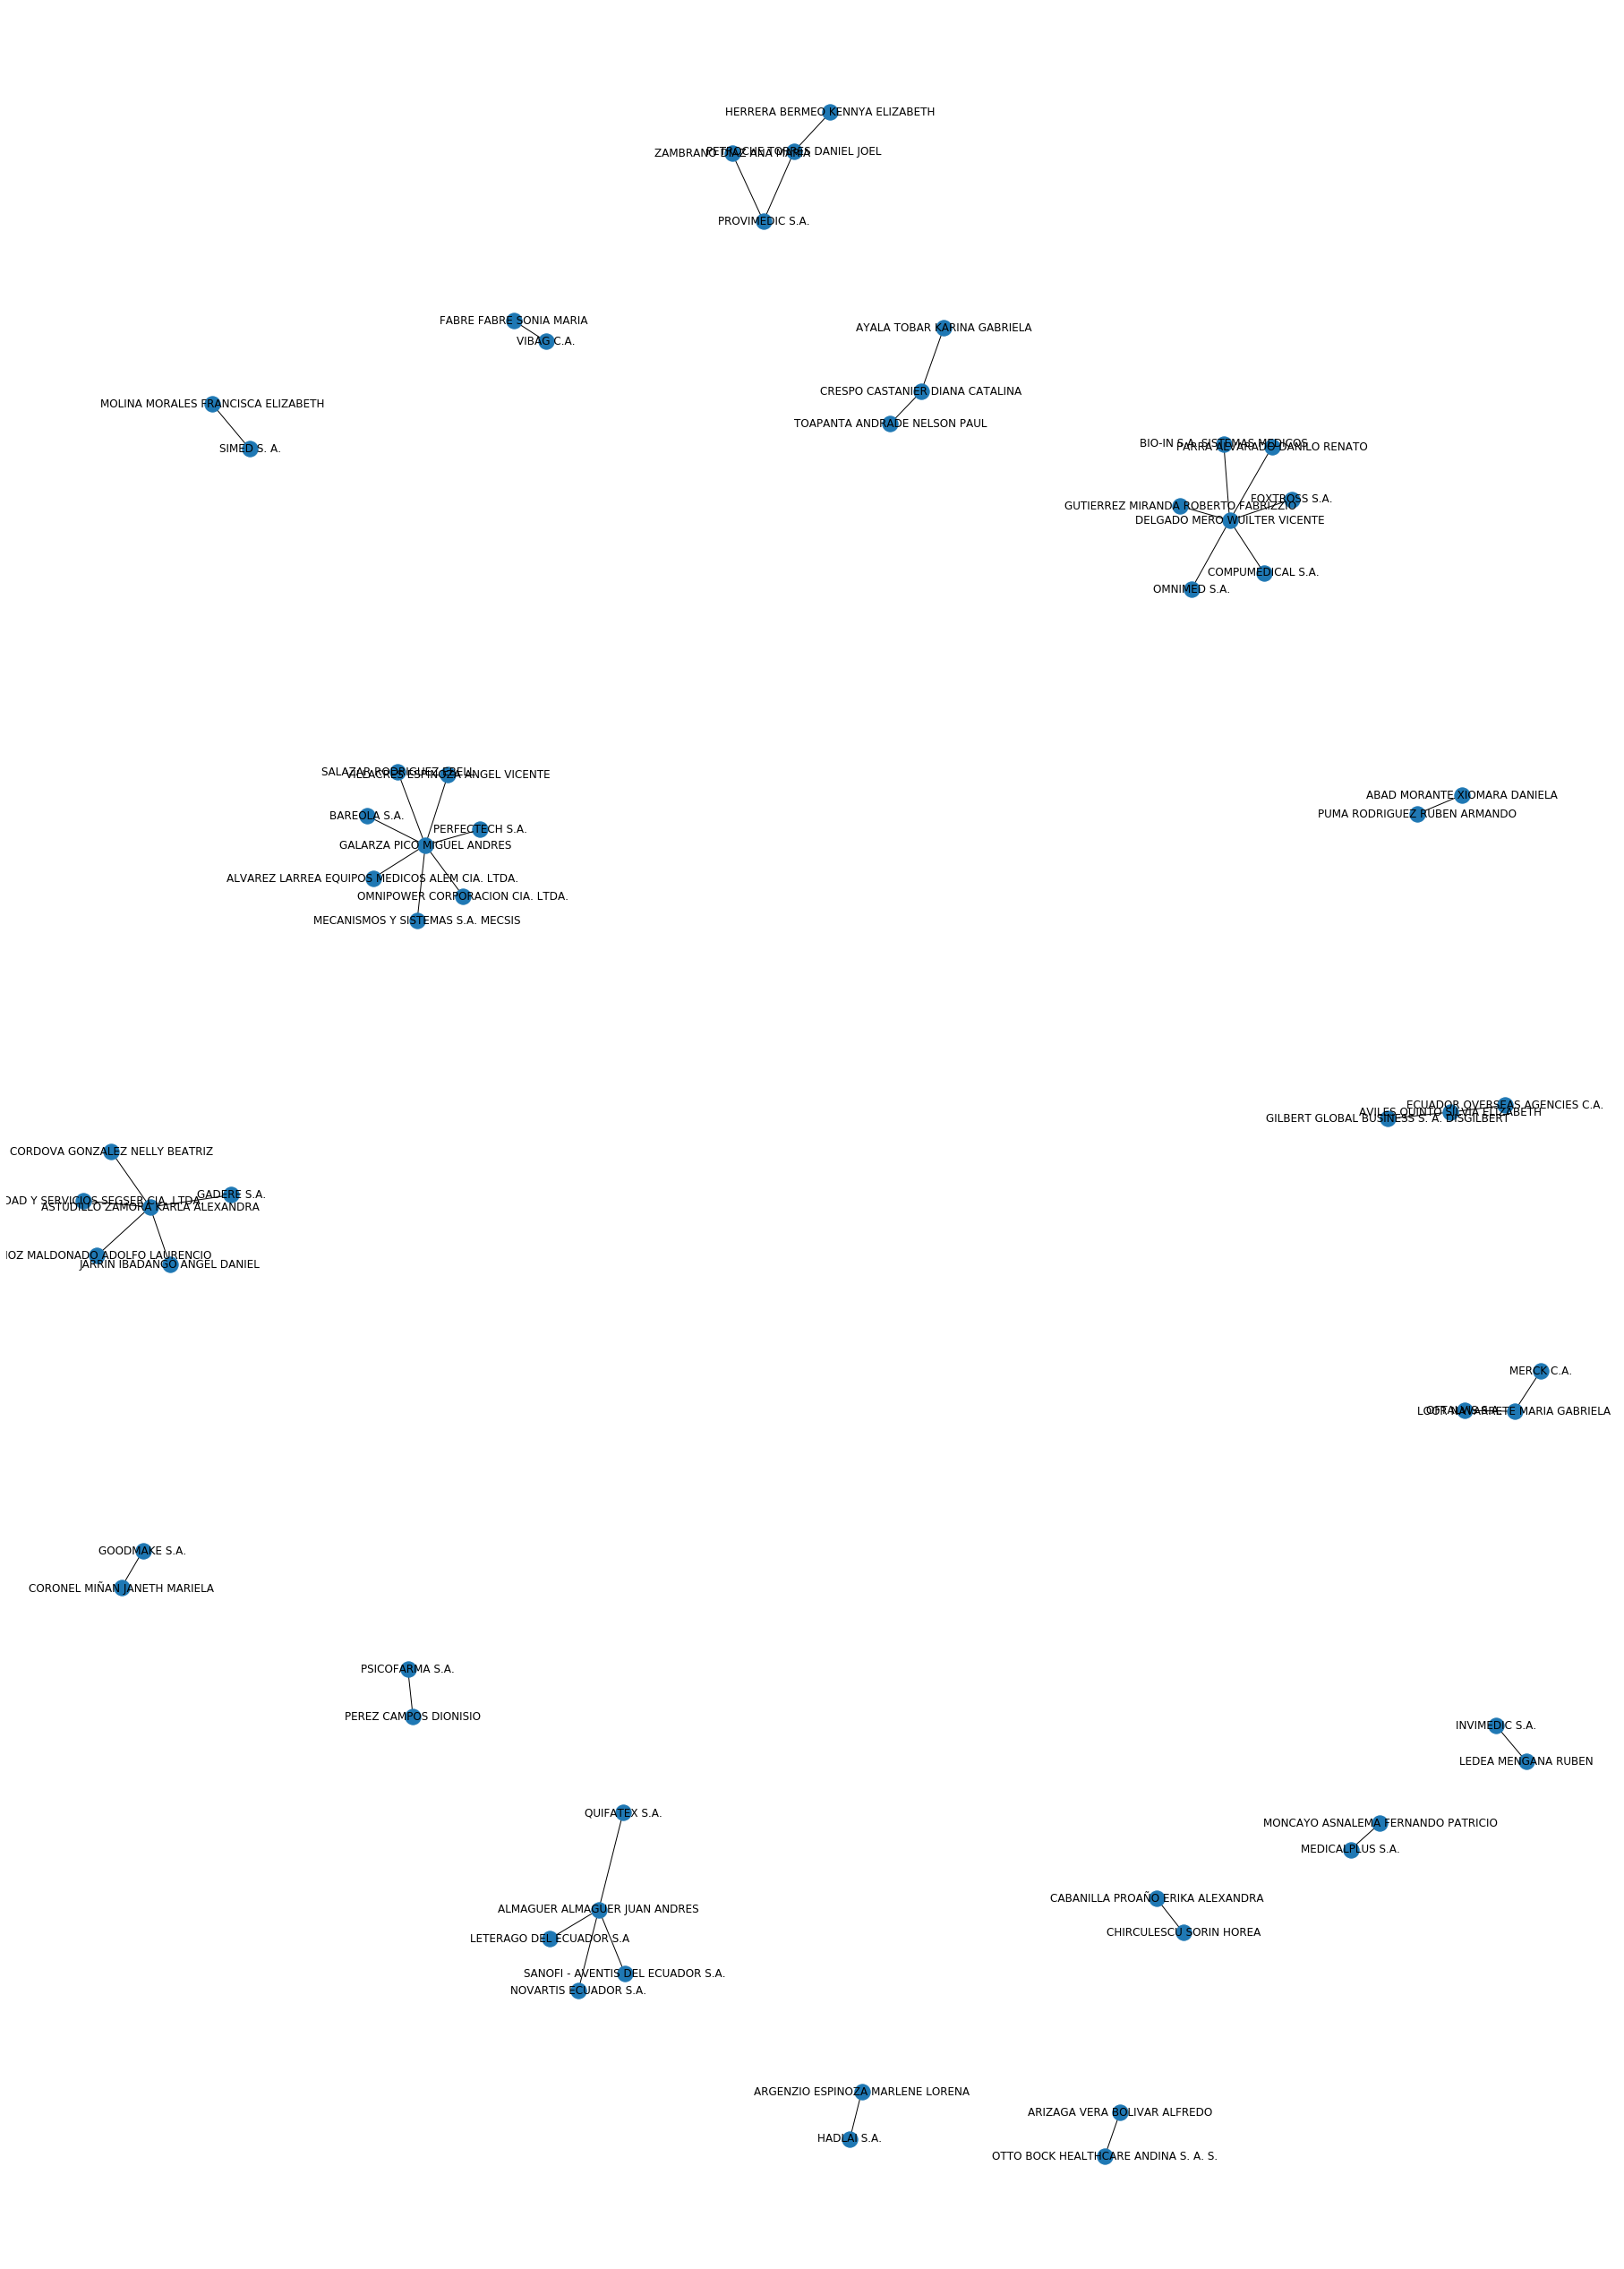

In [61]:
#2020
df2020 = dfcontratos[(dfcontratos.Year == str('2020'))]

df2020 = df2020.groupby(['AdminContact','Company']).agg({'Code':['count']})
df5 = df2020.reset_index()


# Build your graph 2020
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
 


G=nx.from_pandas_edgelist(df5, 'AdminContact', 'Company')
 
# Plot it
figure(figsize=(25, 35))
nx.draw(G, with_labels=True)
plt.show()